In [106]:
import urllib.request
import pandas as pd
import requests
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats, interpolate
from scipy.interpolate import CubicSpline
from tqdm import tqdm
from scipy.stats import uniform
from sklearn.mixture import GaussianMixture
from astropy.visualization.hist import hist as fancyhist
from sklearn.neighbors import KernelDensity
import scipy.stats
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import MeanShift
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns

In [107]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")
df_stars = pd.read_csv("stars.csv")

In [108]:
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


In [109]:
name = df_stars['Star type'].copy()

In [113]:
le = LabelEncoder()
# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels = le.inverse_transform(df_stars['Star type'])
class_names = le.classes_
print(class_names)

[0 1 2 3 4 5]


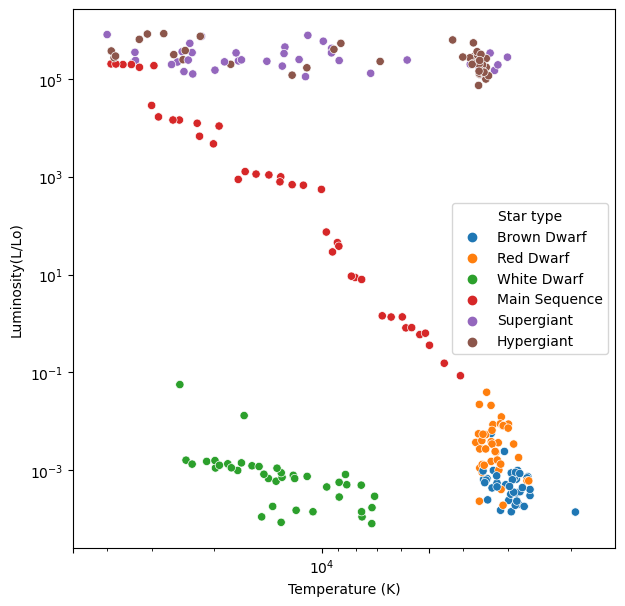

In [114]:
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=name)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()

In [123]:
new_df_stars = df_stars.drop(columns=['Star color', 'Spectral Class', 'Star type'])
new_df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


In [134]:
X = np.array(new_df_stars)
scaler = preprocessing.StandardScaler()
X_scaler = scaler.fit_transform(X)

In [138]:
n_components=2
pca = PCA(n_components)
pca.fit(X_scaler)
evals = pca.explained_variance_ratio_ 
eigenvectors = np.asarray(pca.components_, dtype=float)

In [129]:
X_pca = pca.transform(X_scaler)
df_pca = pd.DataFrame(data=X_pca, columns=['Component 1', 'Component 2'])
df_pca.insert(2, 'Name', name)
df_pca

,Component 1,Component 2,Name
0,-1.476090,-0.343211,Brown Dwarf
1,-1.503654,-0.343857,Brown Dwarf
2,-1.636288,-0.374996,Brown Dwarf
3,-1.515309,-0.364557,Brown Dwarf
4,-1.735919,-0.427500,Brown Dwarf
...,...,...,...
235,3.703168,1.177682,Hypergiant
236,4.729798,0.667365,Hypergiant
237,3.211102,-1.489990,Hypergiant
238,2.553545,-1.117109,Hypergiant


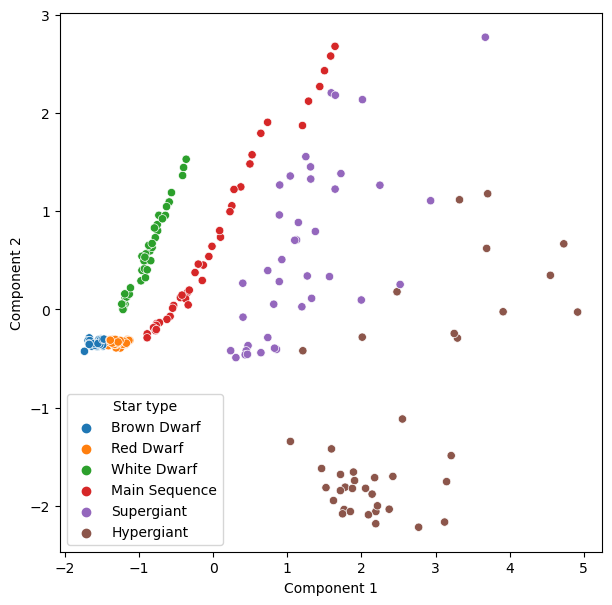

In [130]:
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_pca, x='Component 1', y='Component 2', hue=name);

In [146]:
print('The information contained in the two components of the PCA is %0.2f%%' %((evals[0]+evals[1])*100))

The information contained in the two components of the PCA is 83.86%
